In [18]:
!pip install matplotlib-venn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import pi
import matplotlib.patches as mpatches

from matplotlib_venn import venn3

In [ ]:
df=pd.read_csv(os.path.join(os.getcwd(),'..','..','Datasets/merged.csv'))
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Explicit Track.1,Unnamed: 29
0,4IaxDf2FixiQXq0mW7key9,Jessi,ZOOM,ZOOM,78,174840,False,0.874,0.600,6,...,5.0,53217.0,8.0,NaN,NaN,NaN,778299.0,0,0,NaN
1,1eadPrzB2P0ikQcqhKSAtv,Bad Wolves,Disobey,Zombie,66,254805,False,0.448,0.826,2,...,8.0,9221.0,33.0,300045453.0,184086.0,NaN,5361011.0,0,0,NaN
2,2ooF4088y5L72c4YTEJQoB,XXXTENTACION,Revenge,YuNg BrAtZ,76,101851,True,0.755,0.695,9,...,NaN,NaN,1.0,24600240.0,32645.0,128221222.0,1002168.0,1,1,NaN
3,536vha5aAUhlb50NGDfzfa,flora cash,You're Somebody Else (Acoustic),You're Somebody Else - Acoustic,59,219029,False,0.379,0.247,1,...,24.0,142965.0,22.0,71313267.0,29455.0,9351732.0,4844008.0,0,0,NaN
4,042Sl6Mn83JHyLEqdK7uI0,Billie Eilish,Happier Than Ever,Your Power,77,245896,False,0.632,0.284,9,...,28.0,568814.0,43.0,15646904.0,6432.0,NaN,1144737.0,0,0,NaN


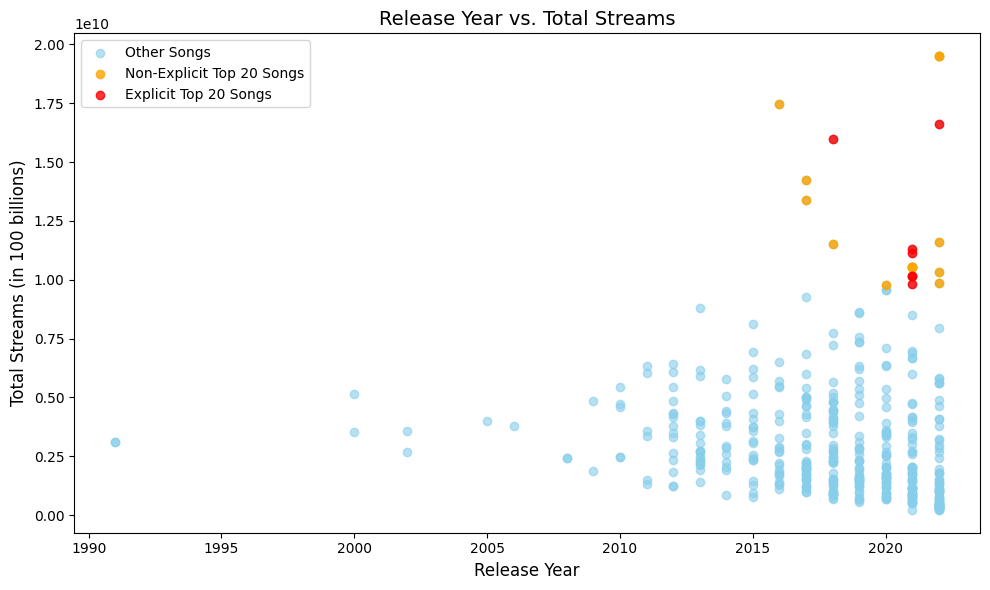

In [ ]:
# Sort and get top 20 songs
df['Total Streams'] = df['Spotify Streams'] + df['YouTube Views'] + df['TikTok Views']
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')
df['Release Year'] = df['Release Date'].dt.year

df_copy = df.copy()

df_copy = df_copy.sort_values(by='Total Streams', ascending=False)

top_20_songs = df_copy.iloc[:20]  # Extract the top 20 songs

# Separate explicit and non-explicit songs from the top 20
explicit_top_20 = top_20_songs[top_20_songs['Explicit Track'] == 1]
non_explicit_top_20 = top_20_songs[top_20_songs['Explicit Track'] == 0]

plt.figure(figsize=(10, 6))

#Plot all songs in 'skyblue'
plt.scatter(df_copy['Release Year'], df_copy['Total Streams'], alpha=0.6, c='skyblue', label='Other Songs')

# Highlight non-explicit top 20 songs in 'orange'
plt.scatter(
    non_explicit_top_20['Release Year'], 
    non_explicit_top_20['Total Streams'], 
    alpha=0.8,
    c='orange',
    label='Non-Explicit Top 20 Songs'
)

# Highlight explicit top 20 songs in 'red'
plt.scatter(
    explicit_top_20['Release Year'], 
    explicit_top_20['Total Streams'], 
    alpha=0.8,
    c='red',
    label='Explicit Top 20 Songs'
)

# Add labels and legend
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Streams (in 100 billions)', fontsize=12)
plt.title('Release Year vs. Total Streams', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),'..','images','loop_2','release_year_vs_totalstreams.png'),dpi=300)
plt.show()


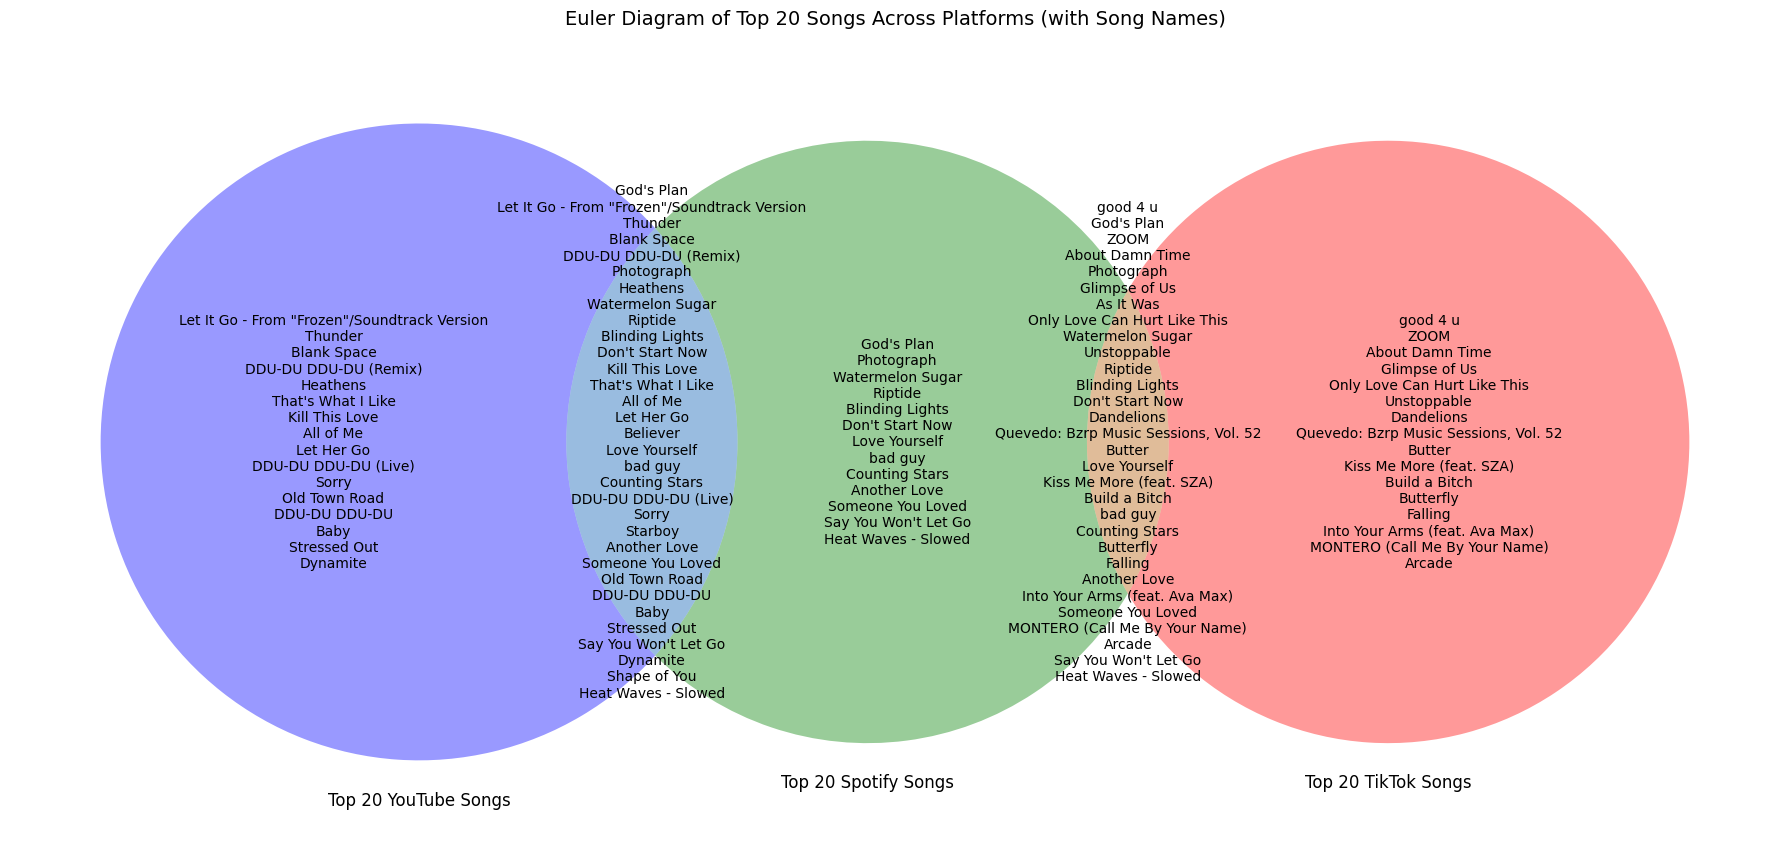

In [ ]:
df = pd.read_csv('../../datasets/merged.csv')
df_copy = df.copy()

# Get the top 20 songs for each platform
tiktok_top_songs = set(df_copy.nlargest(20, 'TikTok Views')['track_name'])
spotify_top_songs = set(df_copy.nlargest(20, 'Spotify Streams')['track_name'])
youtube_top_songs = set(df_copy.nlargest(20, 'YouTube Views')['track_name'])

# Create the Euler diagram (venn3 for 3 sets)
plt.figure(figsize=(18, 14))
venn = venn3(
    [tiktok_top_songs, spotify_top_songs, youtube_top_songs],
    ('Top 20 TikTok Songs', 'Top 20 Spotify Songs', 'Top 20 YouTube Songs')
)

# Annotate the diagram with song names
for region in ['100', '010', '001', '110', '101', '011', '111']:
    if venn.get_label_by_id(region):  # Check if the region exists
        elements = set()
        if '1' in region[0]:  # TikTok
            elements |= tiktok_top_songs
        if '1' in region[1]:  # Spotify
            elements |= spotify_top_songs
        if '1' in region[2]:  # YouTube
            elements |= youtube_top_songs
        
        # Subtract non-overlapping elements
        if region[0] == '0':
            elements -= tiktok_top_songs
        if region[1] == '0':
            elements -= spotify_top_songs
        if region[2] == '0':
            elements -= youtube_top_songs
        
        # Get the label text
        label_text = '\n'.join(elements)
        
        # Update the label
        venn.get_label_by_id(region).set_text(label_text)

# Add a title and display the plot
plt.title('Euler Diagram of Top 20 Songs Across Platforms (with Song Names)', fontsize=14)
plt.tight_layout()
plt.savefig('../images/loop_2/euler_diagram_top20_songs_with_names.png', dpi=300)
plt.show()


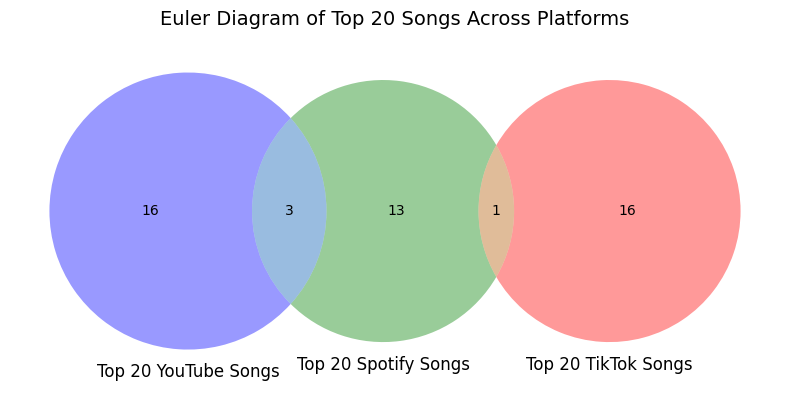

In [ ]:
df = pd.read_csv('../../datasets/merged.csv')
df_copy = df.copy()

# Get the top 20 songs for each platform
tiktok_top_songs = set(df_copy.nlargest(20, 'TikTok Views')['track_name'])
spotify_top_songs = set(df_copy.nlargest(20, 'Spotify Streams')['track_name'])
youtube_top_songs = set(df_copy.nlargest(20, 'YouTube Views')['track_name'])

# Create the Euler diagram (venn3 for 3 sets)
plt.figure(figsize=(8, 6))
venn = venn3(
    [tiktok_top_songs, spotify_top_songs, youtube_top_songs],
    ('Top 20 TikTok Songs', 'Top 20 Spotify Songs', 'Top 20 YouTube Songs')
)

# Add a title and display the plot
plt.title('Euler Diagram of Top 20 Songs Across Platforms', fontsize=14)
plt.tight_layout()
plt.savefig('../images/loop_2/euler_diagram_top20_songs.png', dpi=300)
plt.show()


In [ ]:
pd.read_csv('../../datasets/merged.csv')['track_genre'].value_counts()

track_genre
dance                62
pop                  59
k-pop                57
hip-hop              40
electro              25
rock                 23
country              23
emo                  23
house                14
dancehall            11
r-n-b                 9
folk                  8
soul                  8
progressive-house     8
latino                7
indie-pop             6
indie                 6
garage                5
german                5
british               4
french                4
acoustic              4
reggaeton             4
chill                 3
pop-film              3
show-tunes            3
piano                 3
edm                   3
grunge                3
sad                   2
alternative           2
reggae                2
funk                  2
children              2
swedish               1
metal                 1
salsa                 1
deep-house            1
metalcore             1
indian                1
latin                 1
chic